In [7]:
import contextily
import pygmt
import geopandas

In [2]:
gebco_url: str = 'https://maps.ccom.unh.edu/server/rest/services/GEBCO2022/GEBCO_2022_Bathymetry_GCS_Tiled/MapServer/tile/{z}/{y}/{x}'
osm_url: str = "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png"

#region = [-70.76034, -70.58229, 43.01098, 43.03034]
region = [-71, -70, 42.5, 43.5]

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -71 to -76.7367813373
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -70 to 76.7367813373
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from 42.5 to -76.736781338
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from 43.5 to 76.7367813366


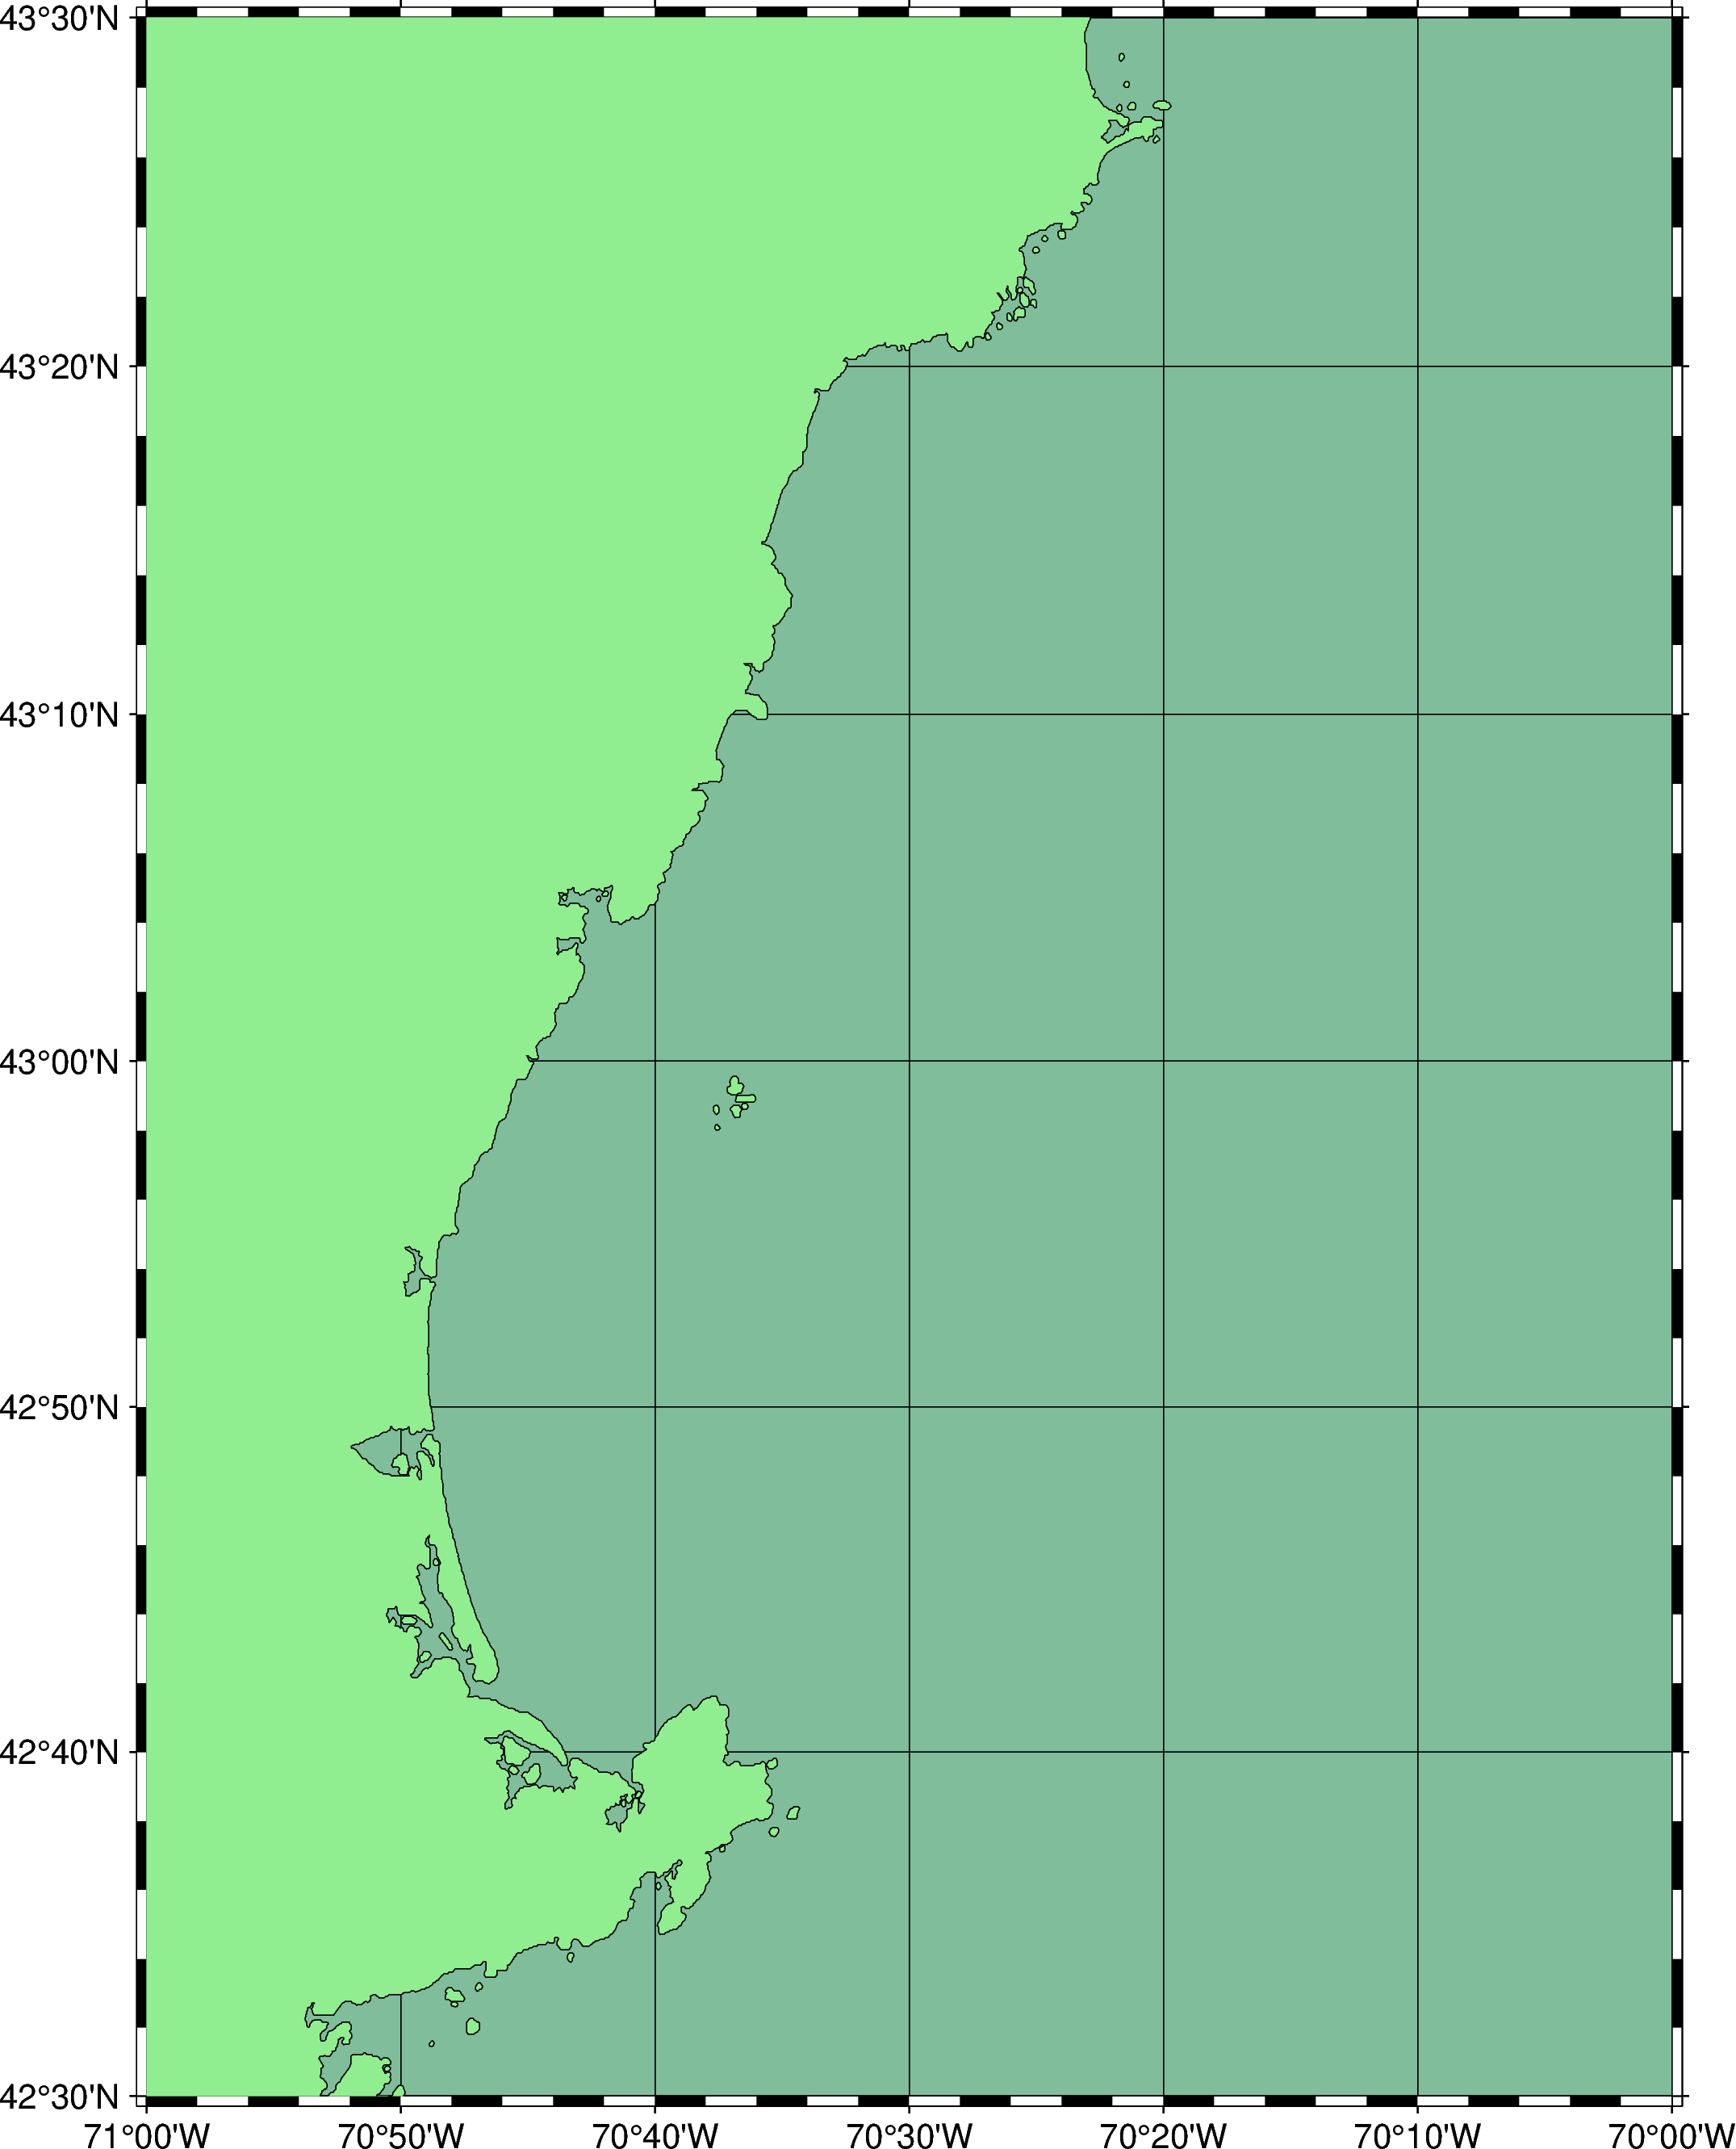

In [14]:
fig = pygmt.Figure()
fig.tilemap(
    lonlat=False,
    #region=[-70.76034, -70.58229, 43.01098, 43.03034],
    #region=[-70.5, -70.0, 42.75, 43.0],
    region=region,
    projection="M16c",
    # Set level of details (0-22)
    # Higher levels mean a zoom level closer to the Earth's
    # surface with more tiles covering a smaller
    # geographic area and thus more details and vice versa
    # Please note, not all zoom levels are always available
    zoom=10,
    # Use tiles from OpenStreetMap tile server
    source=gebco_url,
    frame="afg",
)
fig.coast(
    region=region,
    shorelines=True,
    land="lightgreen",
    #water="lightblue",
    projection="M16c",
)

fig.show()

# Let's plot the basemap from a local HDF5 file just for grins

In [32]:
gebco_path: str = '/tmp/gmtout/GEBCO_2023.nc'
buffer = 0.1

In [4]:
import xarray
gebco_ds: xarray.Dataset = xarray.open_dataset(gebco_path)

In [7]:
gebco_ds.data_vars

Data variables:
    crs        |S1 ...
    elevation  (lat, lon) int16 ...

In [5]:
gebco_el: xarray.DataArray = gebco_ds['elevation']

In [9]:
gebco_el

<xarray.DataArray 'elevation' (lat: 43200, lon: 86400)>
[3732480000 values with dtype=int16]
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat      (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 89.99 90.0
Attributes:
    standard_name:       height_above_mean_sea_level
    long_name:           Elevation relative to sea level
    units:               m
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

In [29]:
example_data = 'data/b12_v3_1_0_example.json'
example_df = geopandas.read_file(example_data)
example_df['x'] = example_df.geometry.apply(lambda p: p.x)
example_df['y'] = example_df.geometry.apply(lambda p: p.y)

In [30]:
example_df

,depth,time,geometry,x,y
0,15.8,2016-03-03T18:41:49+00:00,POINT (41.91483 18.00530),41.914832,18.005296
1,15.2,2016-03-03T18:41:50+00:00,POINT (40.91479 19.00555),40.914789,19.005552
2,16.7,2016-03-03T18:41:52.234200,POINT (40.94179 19.10555),40.941789,19.105552


<Axes: >

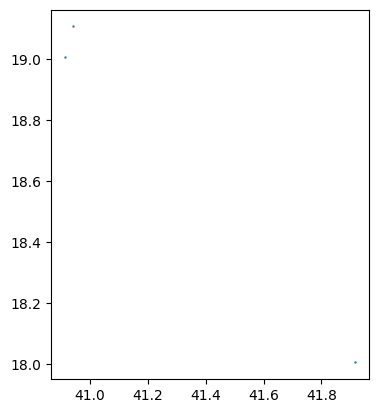

In [11]:
example_df.plot(markersize=0.5)

In [17]:
example_df.total_bounds

array([40.914789, 18.005296, 41.914832, 19.105552])

In [33]:
region = [example_df.total_bounds[0] - buffer,
          example_df.total_bounds[2] + buffer,
          example_df.total_bounds[1] - buffer,
          example_df.total_bounds[3] + buffer]

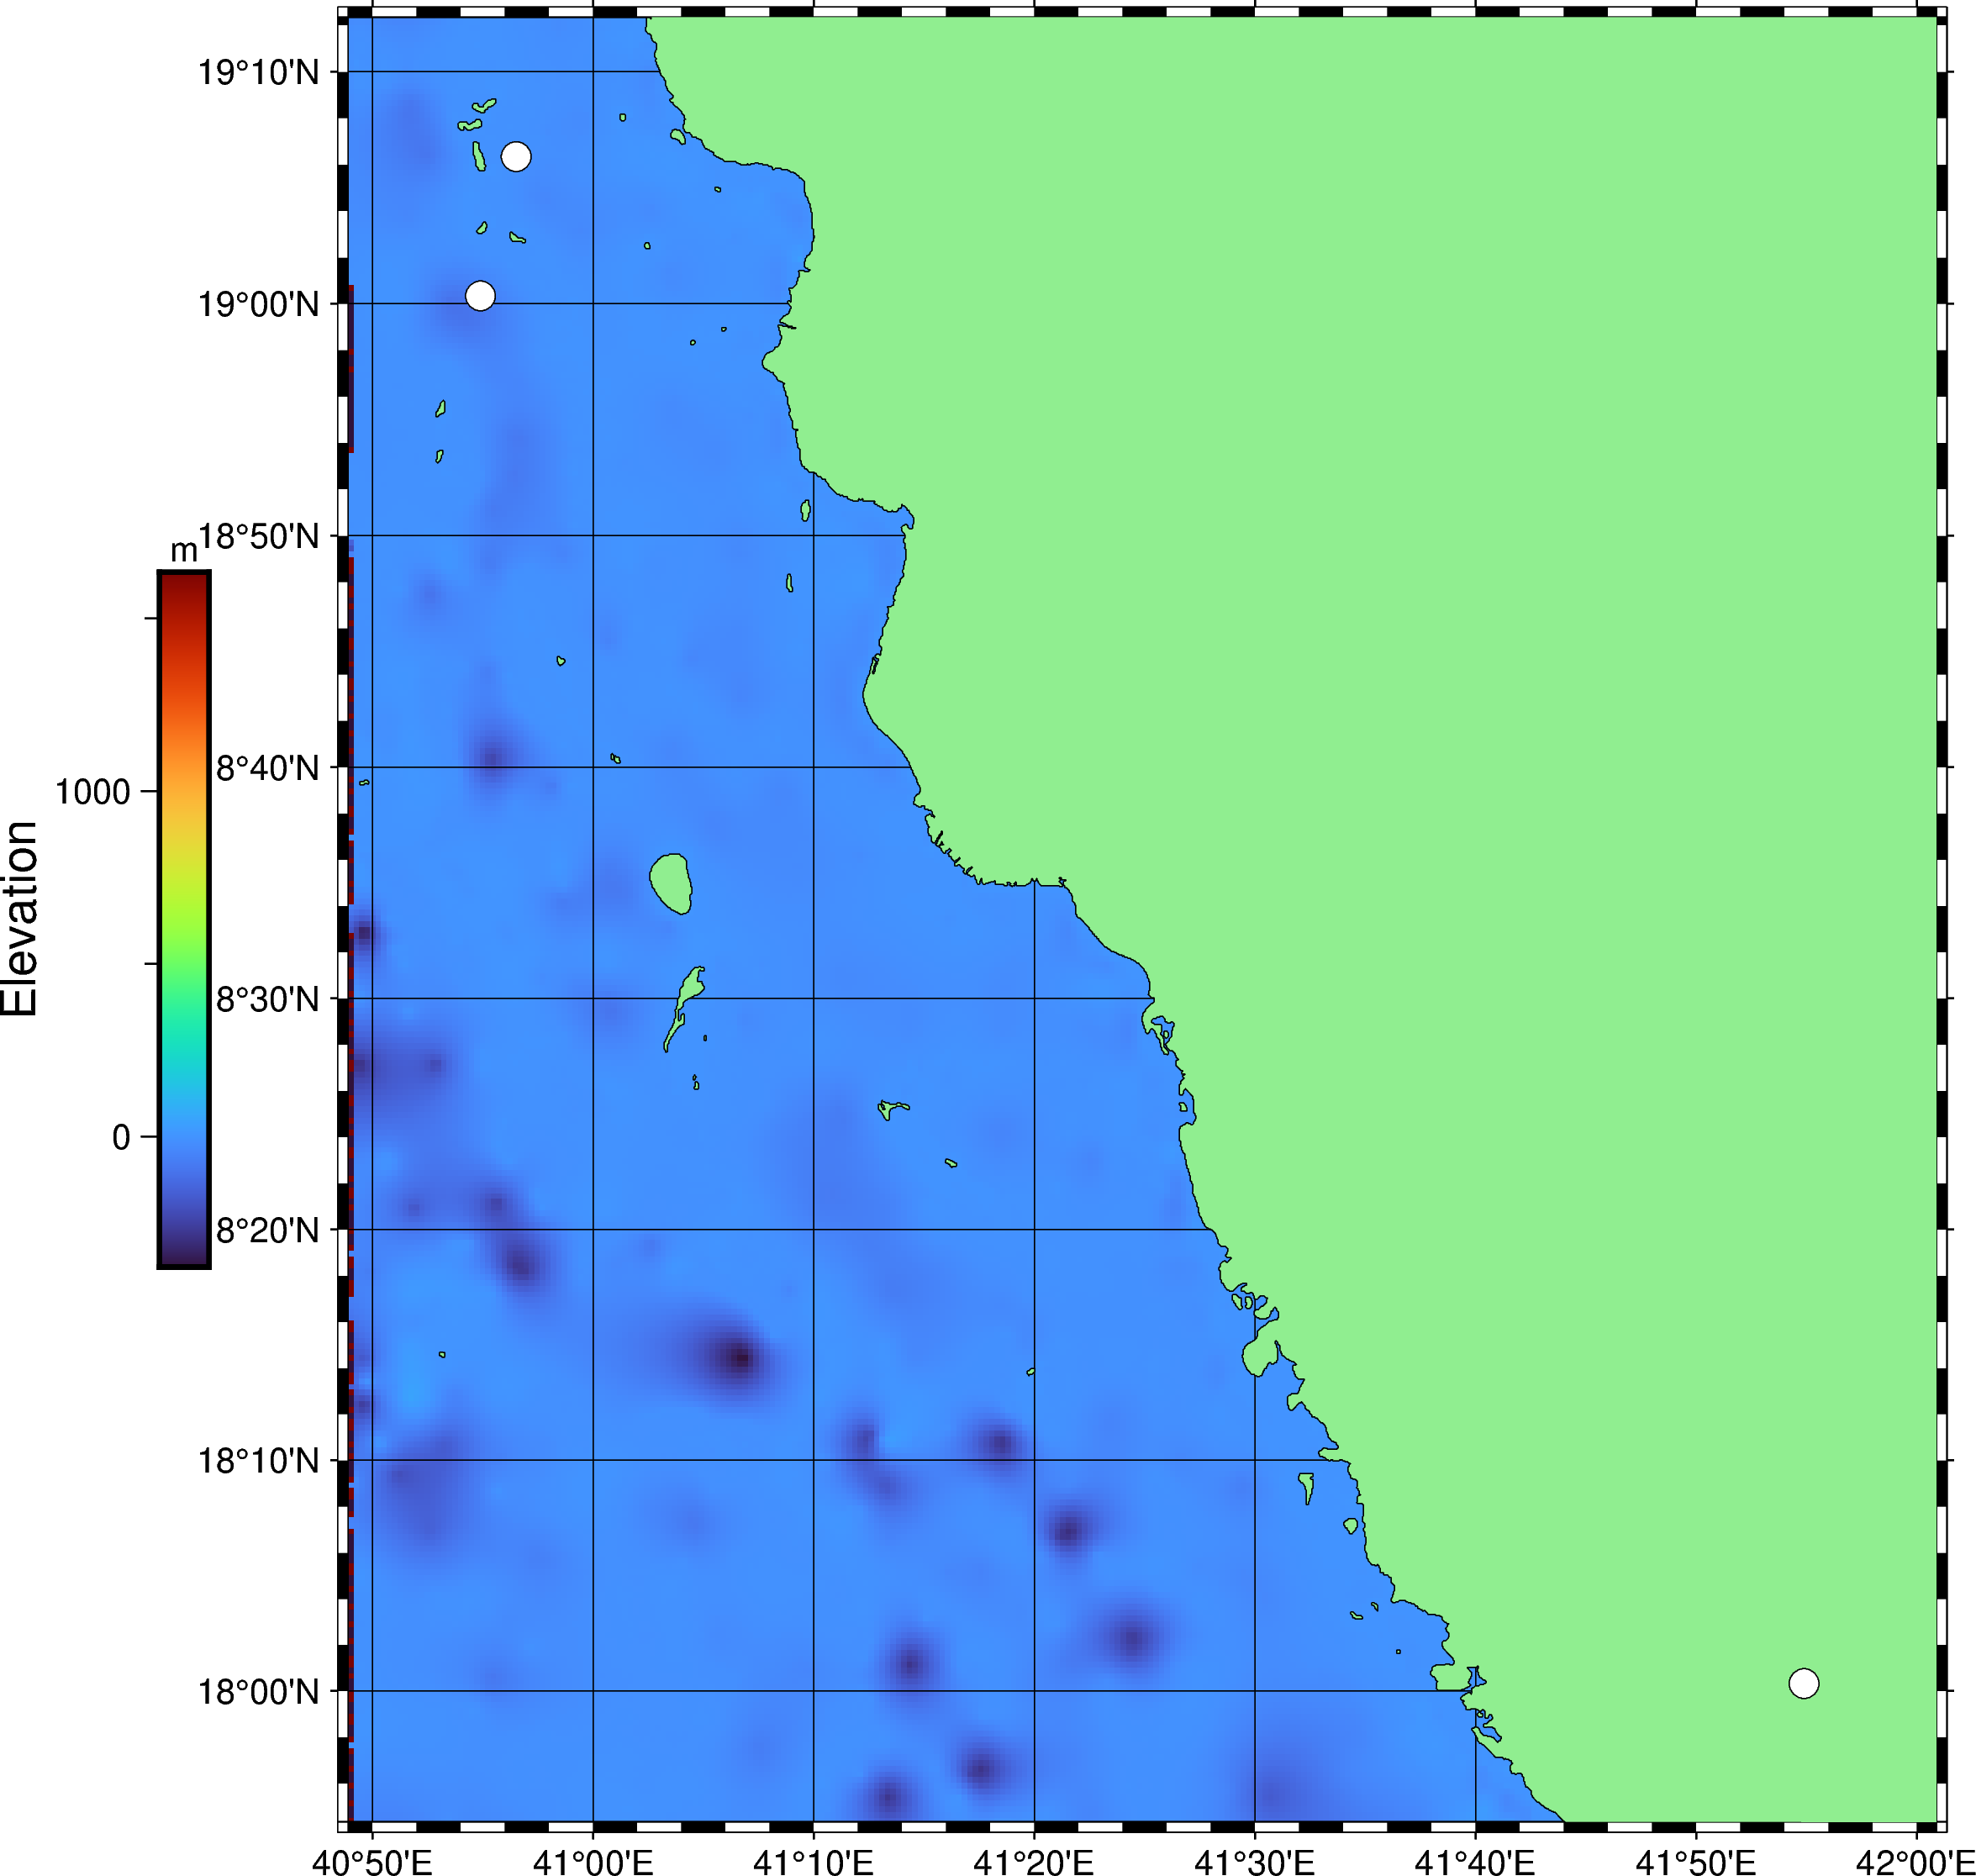

In [34]:
f = pygmt.Figure()
f.grdimage(gebco_el, 
           region=region,
           projection="M16c",
           frame="afg",
           cmap=True)

f.colorbar(position="JML+o1.4c/0c+w7c/0.5c", frame=["xa1000f500+lElevation", "y+lm"])

f.coast(
    region=region,
    shorelines=True,
    land="lightgreen",
    #water="lightblue",
    projection="M16c",
)

f.plot(x=example_df.x, y=example_df.y, style="c0.3c", fill="white", pen="black")

f.show()